In [1]:
# import libraries we will need later
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import metrics

***********

## Regression example

We will be using the famous boston housing dataset. It contains preprocessed/clean data about the housing market in the Boston city region.  The goal is to estimate house price as a function of other characteristics of a house.

### 1) Get the data

In [3]:
from sklearn import datasets

In [4]:
boston_data = datasets.load_boston()

In [6]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [7]:
# names of predictor attributes
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
# description of the dataset
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
# target attribute
y = boston_data.target
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(506,)


In [10]:
# predictor attributes
X = boston_data.data
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(506, 13)


In [11]:
# We can also put this data into a Pandas data frame
bos_df = pd.DataFrame(boston_data.data)
bos_df.columns = boston_data.feature_names
bos_df['PRICE'] = boston_data.target

In [12]:
type(bos_df)
print(bos_df.shape)

(506, 14)


In [13]:
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2) Split the data into training and testing



In [14]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)

### 3) Pattern extraction and evaluation

#### Using linear regression method

Reference: http://bigdataexaminer.com/2016/03/31/how-to-run-linear-regression-in-python-scikit-learn/

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# create object
model1 = LinearRegression()

In [17]:
# call learning algorithm with training data
model1.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# values of coefficients, i.e. a1, a2, ..., ap
model1.coef_

array([-9.78127294e-02,  5.07714224e-02,  2.97732153e-02,  2.80916619e+00,
       -1.84065362e+01,  3.83222144e+00, -1.24919057e-03, -1.47539577e+00,
        2.68067852e-01, -1.06637886e-02, -9.95627517e-01,  8.87824428e-03,
       -5.13885339e-01])

In [19]:
# the intercept value , i.e. a0
model1.intercept_

37.24234873875068

In [20]:
df = pd.DataFrame( {'feature name': boston_data.feature_names, 'coefficient': model1.coef_})
df

,coefficient,feature name
0,-0.097813,CRIM
1,0.050771,ZN
2,0.029773,INDUS
3,2.809166,CHAS
4,-18.406536,NOX
5,3.832221,RM
6,-0.001249,AGE
7,-1.475396,DIS
8,0.268068,RAD
9,-0.010664,TAX


In [21]:
# use extracted pattern to make predictions
ypred = model1.predict(Xtest)

In [22]:
# measure accuracy
print("Root mean squared error: %.3f" % np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(ytest, ypred))

Root mean squared error: 4.736
Mean Absolute Error: 3.351


#### Support Vector Machines method
Reference: http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

In [23]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.0001)
y_rbf = svr_rbf.fit(Xtrain, ytrain).predict(Xtrain)


In [24]:
ypred1= svr_rbf.predict(Xtest)
print("Root mean squared error: %.3f" % np.sqrt(metrics.mean_squared_error(ytest, ypred1)))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(ytest, ypred1))

Root mean squared error: 4.750
Mean Absolute Error: 3.203


#### KNN method


In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(Xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [28]:
ypred_KNN= knn_model.predict(Xtest)
print("Root mean squared error: %.3f" % np.sqrt(metrics.mean_squared_error(ytest, ypred_KNN)))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(ytest, ypred_KNN))

Root mean squared error: 6.510
Mean Absolute Error: 4.523


## Cross-Validation and Hyperparameter Tuning



#### Cross-Validation of KNN Method
We are going to use 5-fold cross-validation to estimate the accuracy of the KNN method with ``n_neighbors=3``.


In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
# Create instance of class with desired value of n_neighbors
knn_model_2 = KNeighborsRegressor(n_neighbors=3)

# Call kfold-CV procedure
scores_neg_mse = cross_val_score(knn_model_2, X, y, cv=5, scoring='neg_mean_squared_error')
scores_rmse = np.sqrt(-scores_neg_mse)  # convert results to RMSE

In [32]:
df = pd.Series(scores_rmse) # put results in a Pandas Series
df.describe()

count     5.000000
mean      8.723110
std       1.806146
min       5.918042
25%       8.440771
50%       8.931947
75%       9.486439
max      10.838352
dtype: float64

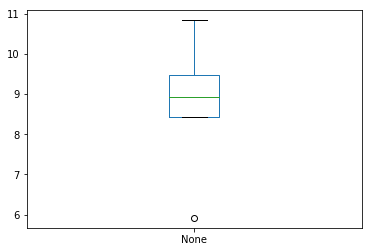

In [34]:
df.plot(kind='box')

#### Hyperparameter Tuning of KNN Method
- In the previous experiment, we tried different data splits (using 10-fold cross-validation) in order to obtain a better estimate of the method's accuracy. The value of the hyperparameter ``n_neighors``, the number of neighbors, was kept fixed.
- Here we will do the same thing, but will also vary the value of ``n_neighbors`` in order to find the value that maximizes accuracy.


In [35]:
# set of candidate hyperparameter values
k_values = list(range(1, 21))
cv_rmse = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    u = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')  # perform 5-fold cross-validation on KNN with this value of K
    rmse = np.sqrt(-u)   # convert from negative-MSE to RMSE
    cv_rmse.append(np.mean(rmse))  # calculate the average RMSE for this value of K

In [36]:
# Put the results in a data frame
df = pd.DataFrame({ 'n_neighbors' : k_values , 'CV_rmse': cv_rmse})
df.head()

,CV_rmse,n_neighbors
0,10.228882,1
1,9.054237,2
2,8.723110,3
3,8.599701,4
4,8.608741,5


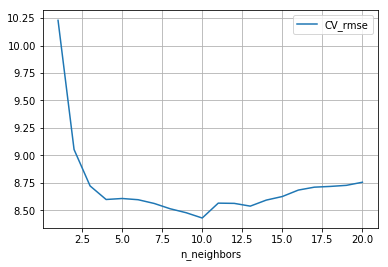

In [37]:
df.plot.line(x='n_neighbors', y='CV_rmse', grid=True)

According to the results, the value of n_neighbours is the one that minimizes the CV_RMSE value. From the plottings above, the best value of n is 10 since both plots reach their minimum in the value of n =10.

#### Second approach
Calling the `GridSearchCV` function.

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# define the parameter values that should be searched
k_range = list(range(1, 21))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [41]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [42]:
# create an instance of the class
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=False)

In [43]:
# perform the grid search
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='neg_mean_squared_error', verbose=0)

In [44]:
# display the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,-105.912668,21.942190,{'n_neighbors': 1}
1,-85.733167,30.951454,{'n_neighbors': 2}
2,-78.704515,26.787721,{'n_neighbors': 3}
3,-76.799482,27.113474,{'n_neighbors': 4}
4,-76.934885,26.956201,{'n_neighbors': 5}
5,-76.128704,24.596921,{'n_neighbors': 6}
6,-75.863293,26.159663,{'n_neighbors': 7}
7,-75.109599,26.121403,{'n_neighbors': 8}
8,-74.552211,25.929817,{'n_neighbors': 9}
9,-74.054013,26.950102,{'n_neighbors': 10}


In [45]:
# print the array of mean scores only
grid_mean_scores = np.sqrt(-grid.cv_results_['mean_test_score'])
print(grid_mean_scores)

[10.29138805  9.25922065  8.8715565   8.76353139  8.77125335  8.72517647
  8.70995368  8.66657944  8.63436219  8.60546414  8.69054048  8.68148684
  8.66465059  8.70543603  8.73390204  8.78278415  8.80572444  8.81231868
  8.82056271  8.84199249]


Text(0,0.5,'Cross-Validated RMSE')

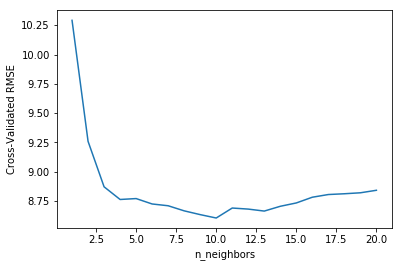

In [47]:
# plot the results
from matplotlib import pyplot as plt

# allow plots to appear inside the notebook
%matplotlib inline
plt.plot(k_range, grid_mean_scores)
plt.xlabel('n_neighbors')
plt.ylabel('Cross-Validated RMSE')

In [48]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

-74.05401304347826
{'n_neighbors': 10}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
